# Hepatitis C Prediction

Author: Y. Staeva

The aim of this project is to develop a Machine Learning model for Hepatitis C prediction.

The data used for this project is available at:

UCI Machine Learning Repository

Link: https://archive.ics.uci.edu/ml/datasets/HCV+data

Note: This script is for educational purposes only.

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus

**Read the dataset**

In [ ]:
hepatitis_data = pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv')

**Check if the dataset is correctly read**

In [ ]:
hepatitis_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
hepatitis_data.shape

(615, 14)

**Check for NaN and Null values within the dataset.**

In [ ]:
hepatitis_data.isnull()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
hepatitis_data.isna()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,True,False,False,False,False,False,False,False,False


**Remove the NaN values, as they contain no information on blood status.**

In [ ]:
hepatitis_data = hepatitis_data.dropna(axis = 0, how = 'any')

**Convert the dataframe into vector, in order to manipulate it with Numpy.**

In [ ]:
hepatitis_vector = hepatitis_data.to_numpy()

**Extract features and target value.**

In [ ]:
features = hepatitis_vector[:, 4 : 14]

In [ ]:
features.shape

(589, 10)

In [ ]:
features

array([[38.5, 52.5, 7.7, ..., 106.0, 12.1, 69.0],
       [38.5, 70.3, 18.0, ..., 74.0, 15.6, 76.5],
       [46.9, 74.7, 36.2, ..., 86.0, 33.2, 79.3],
       ...,
       [32.0, 416.6, 5.9, ..., 55.7, 650.9, 68.5],
       [24.0, 102.8, 2.9, ..., 63.0, 35.9, 71.3],
       [29.0, 87.3, 3.5, ..., 66.7, 64.2, 82.0]], dtype=object)

In [ ]:
target = hepatitis_vector[:, 1]

In [ ]:
target.shape

(589,)

**Select predictive features by using Principal Component Analysis.**

In [ ]:
principal_component_analysis = PCA(n_components = 0.8, whiten=False)

In [ ]:
selected_features = principal_component_analysis.fit_transform(features)

**Compare number of original features to number of selected features.**

In [ ]:
features.shape[1]

10

In [ ]:
selected_features.shape[1]

6

**Divide the data into training and testing set.** 

The proportion is: 70% of data are used for training, and the remaining 30% of data are used for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(selected_features,target, train_size = 0.7, random_state = 42, shuffle = True)

**Create a Decision Tree Classifier**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [ ]:
Decision_tree_model = decision_tree.fit(x_train, y_train)

**View the classifier**

In [ ]:
tree_data = tree.export_graphviz(decision_tree, out_file=None, class_names=target)

In [ ]:
graph = pydotplus.graph_from_dot_data(tree_data)

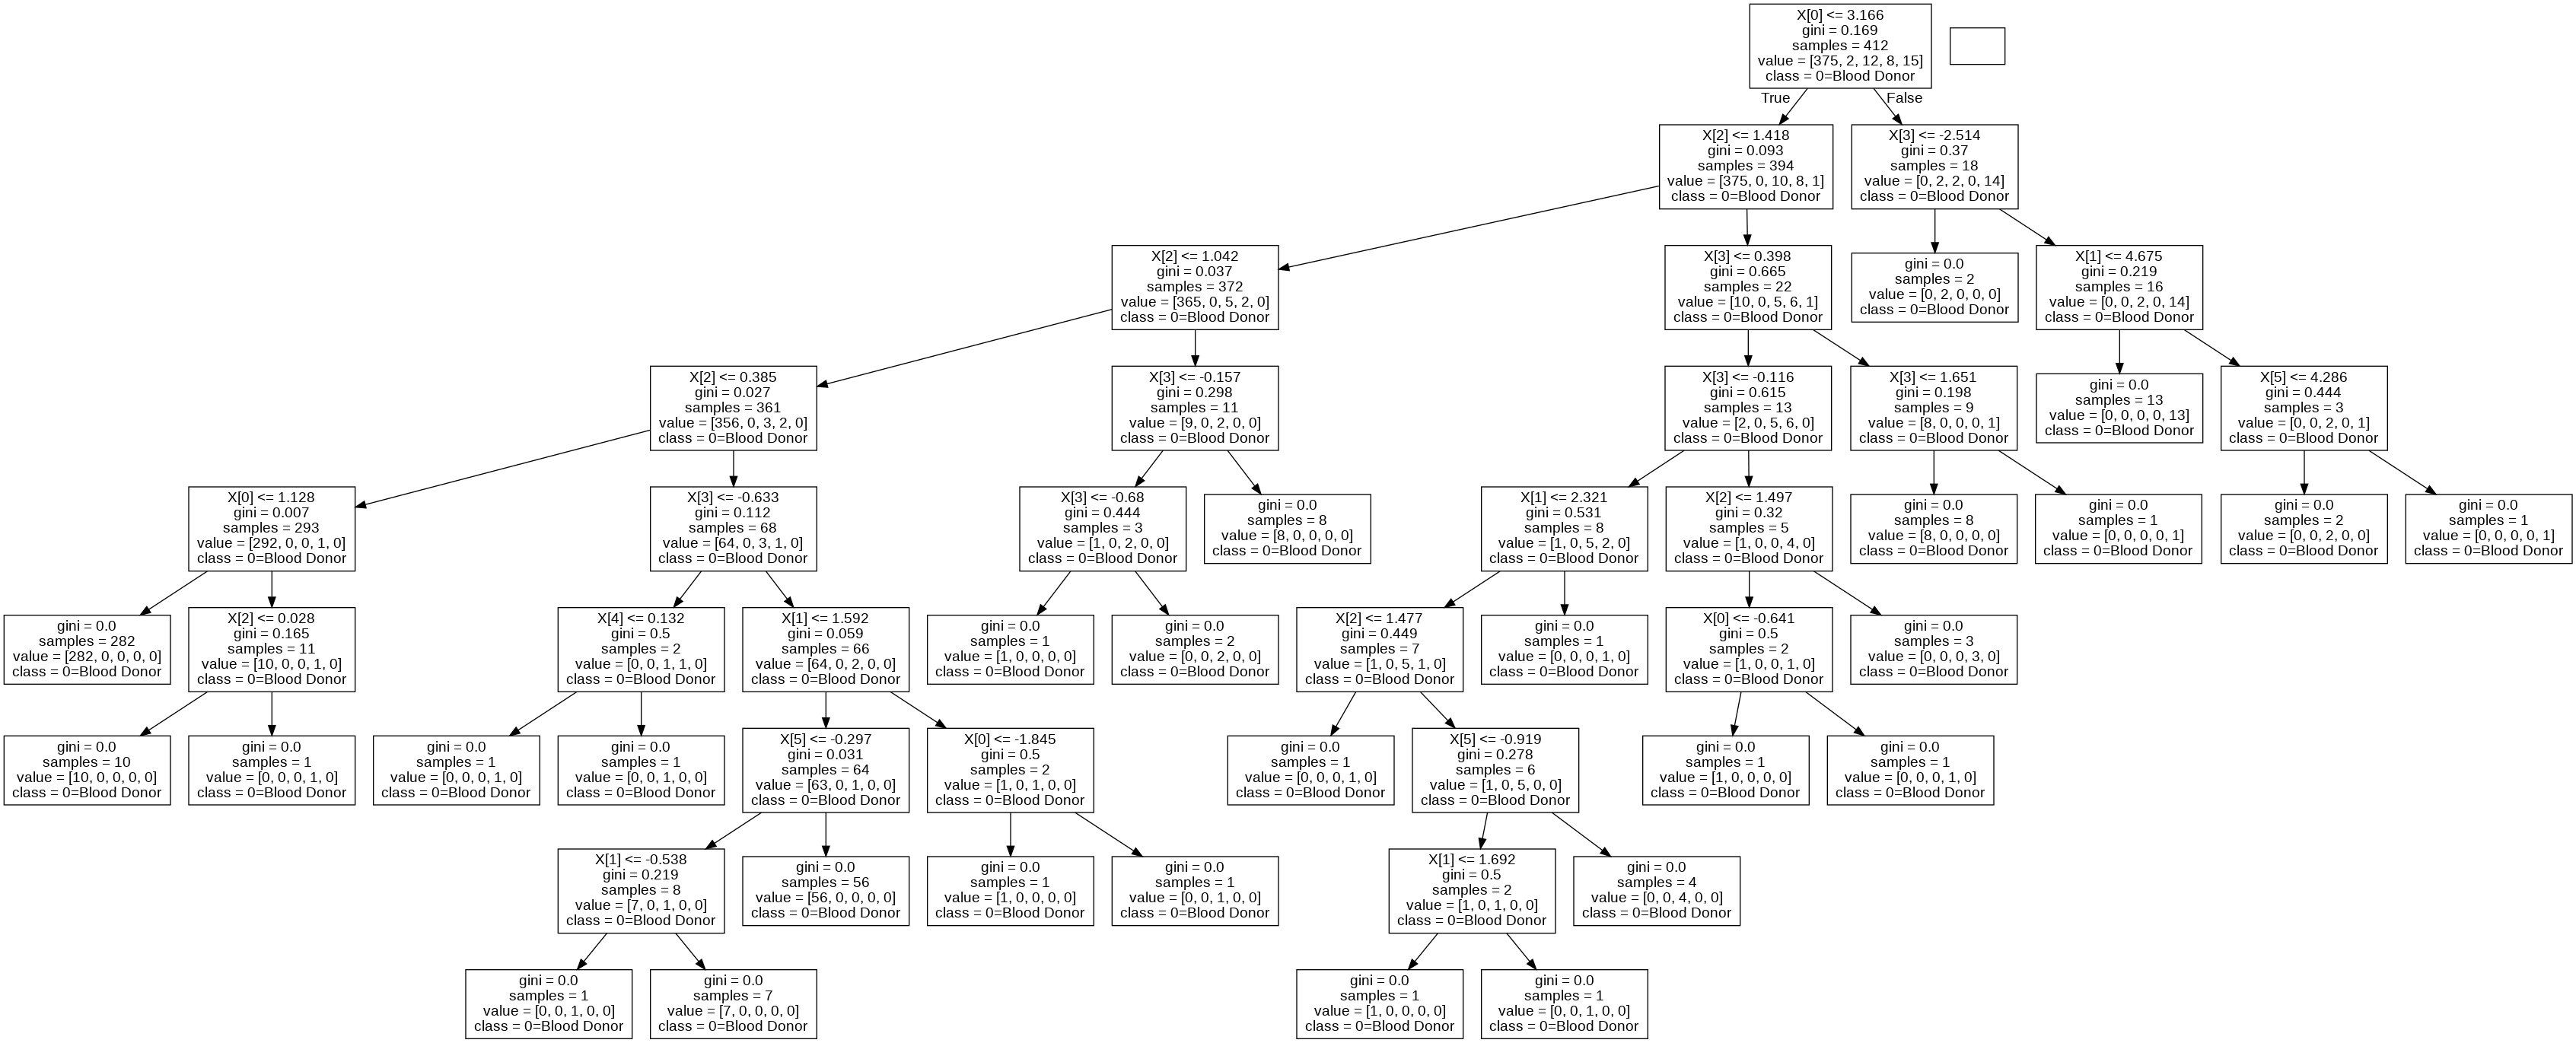

In [ ]:
Image(graph.create_png())

Note:

It is impossible to view the entire classifier, as the number of samples is quite large to fit in an image.

**Create a Random Forest Classifier**

In [40]:
random_forest = RandomForestClassifier(random_state=0, n_estimators=100, oob_score=True)

In [41]:
Random_forest_model = random_forest.fit(x_train, y_train)

**Evaluate Random Forest Classifier performance**

In [43]:
random_forest.oob_score_

0.9368932038834952

Note: The Out-Of-Bag observations are used as a test to evaluate the performance of a random forest. Since a random forest consists of multiple random decision trees, and the final decision of a class is voted via a Bagging technique, the learning algorithm compares the true class value to the one predicted by a subset of trees in the random forest. This evaluation method is similar to K-cross fold validation.


**Reference:** 

C. Albon (2018): Machine Learning with Python Cookbook ; O'Reilly Media Inc, CA 95472 , United States of America